In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor()
# print(boston)
print(cross_val_score(regressor,boston.data, boston.target, cv=10))

[ 0.52753836  0.58411073 -1.6206476   0.5137294   0.77254245  0.51843096
  0.17744687  0.39910033 -2.40097679 -0.30434875]


In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
classifier = DecisionTreeClassifier()
print(cross_val_score(classifier,iris.data,iris.target,cv=10))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [14]:
from sklearn import tree
iris = load_iris()
iris.feature_names

clf = DecisionTreeClassifier(max_depth=3, random_state=None)
clf.fit(iris.data,iris.target)
with open("D:/data/iristree1.txt","w") as f:
    f = tree.export_graphviz(clf, out_file=f,feature_names=iris.feature_names,class_names=['Sentosa','Virginica','Versicol'])
# Above command creates a file which can be used to for graphical interpretation using graphviz web interface 

In [46]:
import pandas as pd
url = "D:/data/Churn.xls"
df = pd.read_excel(url)
df.shape
display(df.head())
df.describe()
df.dtypes

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
State              object
Area Code           int64
Phone              object
dtype: object

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df = df.drop(["Phone","Area Code", "State"],axis=1)

In [35]:
# Below tells algo that except Churn, all are X variable
features = df.drop(["Churn"],axis=1).columns

In [44]:
df_train, df_test = train_test_split(df,test_size=0.25)
# display(df_train.head())
# display(df_test.head())

# Creates a forrest upon all training data
clf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=10,random_state=1)
clf.fit(df_train[features],df_train["Churn"])

# Now make predtictions 
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(df_test["Churn"],predictions))
print("\n")
print(metrics.classification_report(df_test["Churn"],predictions))
print("\n")
print(metrics.confusion_matrix(df_test["Churn"],predictions))
display(df_test.shape)
# display(df_train.shape)

Accuracy: 0.9364508393285371


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       712
           1       0.91      0.63      0.74       122

    accuracy                           0.94       834
   macro avg       0.92      0.81      0.85       834
weighted avg       0.93      0.94      0.93       834



[[704   8]
 [ 45  77]]


(834, 18)

(2499, 18)

,importance,labels
2,0.171025,Day Mins
10,0.140669,Day Charge
6,0.139477,CustServ Calls
7,0.093093,Int'l Plan
12,0.075338,Eve Charge


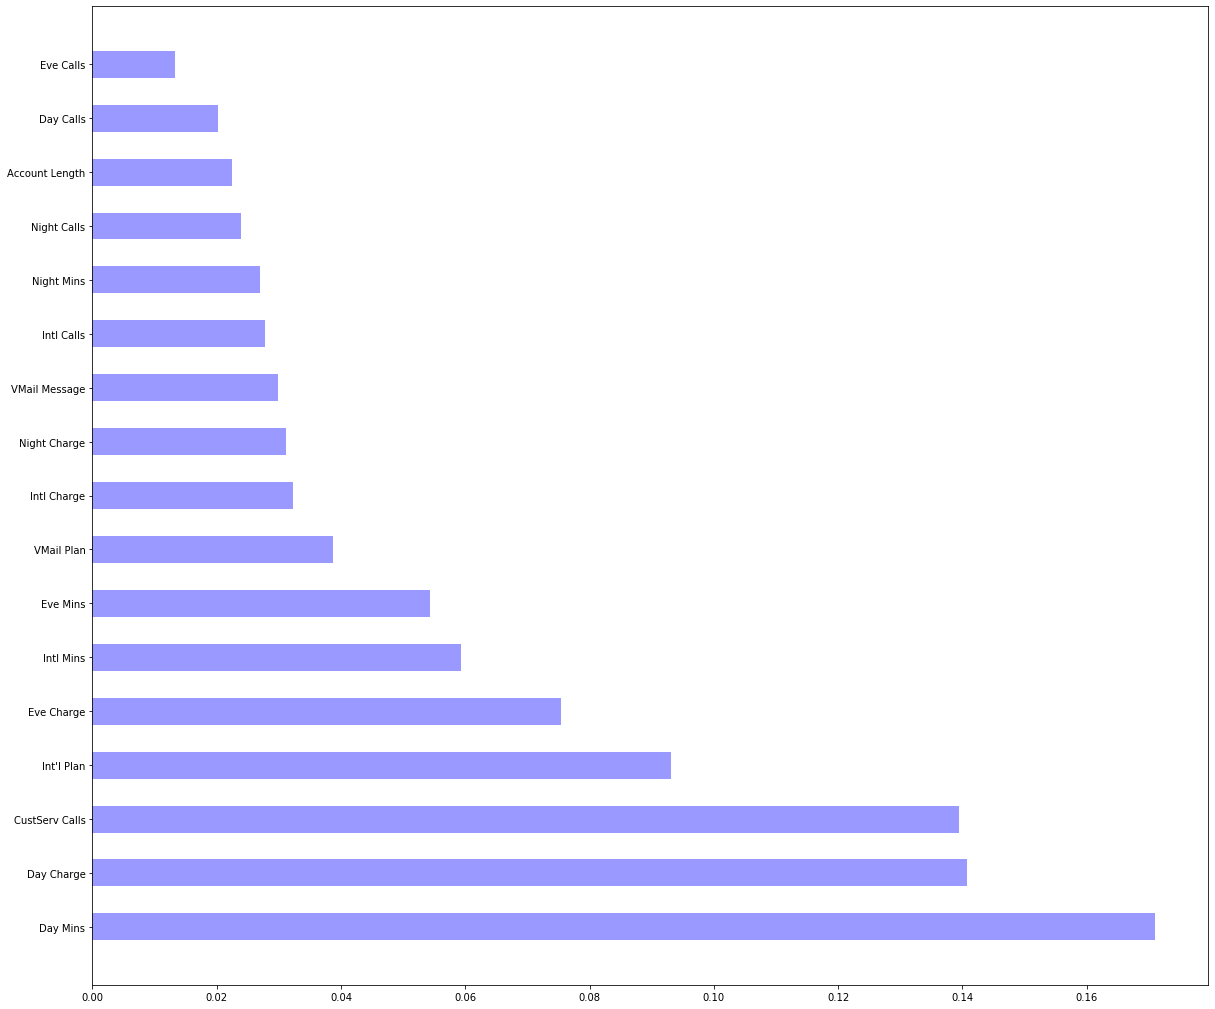

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)



df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5

rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [65]:
df_test["prob_true"] = probs[:,1]
df_risky = df_test[df_test["prob_true"]>0.9]
display(df_risky.head()[["prob_true"]])
display(df_risky.shape)

,prob_true
3272,0.984615
2267,0.984615
2112,0.950000
2708,1.000000
454,0.903030


(27, 19)